In [2]:
'''t = raw[['T' + str(i) for i in range(1, 25)]]

median_filter = lambda row: scipy.ndimage.filters.median_filter(row, size=5)
t_filtered = t.apply(median_filter, axis=1, result_type='expand')

t_avg = t.mean(axis=1)
t_f_avg = t_filtered.mean(axis=1)



fig, axs = plt.subplots(2, 2, figsize=(15,10))

print(raw)

axs[0, 0].plot(t.to_numpy()[0], label='Необработанные данные')
axs[0, 0].plot(t_filtered.to_numpy()[0], '--', label='После медианного фильтра')
axs[0, 0].legend()

axs[0, 1].plot(t.to_numpy()[10], label='Необработанные данные')
axs[0, 1].plot(t_filtered.to_numpy()[10], '--', label='После медианного фильтра')
axs[0, 1].legend()

plt.show()
'''

"t = raw[['T' + str(i) for i in range(1, 25)]]\n\nmedian_filter = lambda row: scipy.ndimage.filters.median_filter(row, size=5)\nt_filtered = t.apply(median_filter, axis=1, result_type='expand')\n\nt_avg = t.mean(axis=1)\nt_f_avg = t_filtered.mean(axis=1)\n\n\n\nfig, axs = plt.subplots(2, 2, figsize=(15,10))\n\nprint(raw)\n\naxs[0, 0].plot(t.to_numpy()[0], label='Необработанные данные')\naxs[0, 0].plot(t_filtered.to_numpy()[0], '--', label='После медианного фильтра')\naxs[0, 0].legend()\n\naxs[0, 1].plot(t.to_numpy()[10], label='Необработанные данные')\naxs[0, 1].plot(t_filtered.to_numpy()[10], '--', label='После медианного фильтра')\naxs[0, 1].legend()\n\nplt.show()\n"

In [3]:
'''
df = pd.DataFrame()

# Энергопотребление
e = raw[['E' + str(i) for i in range(1, 25)]]
df['E_avg'] = e.mean(axis=1)

# Температура по часам 
t = raw[['T' + str(i) for i in range(1, 25)]]
df['T_avg'] = t.mean(axis=1)

# FT 
ft_labels = ['FT' + str(i) for i in range(4, 23, 6)]
df[ft_labels] = raw[ft_labels]

# День недели
dow = pd.get_dummies(raw['Day of week'])
dow.columns = ['DoW' + str(col) for col in dow.columns]
df = pd.concat([df, dow], axis=1)

# Тип дня - будний/выходной
df['ToD'] = raw['Type of day'] - 1

# Время года
df['WST'] = raw['Winter-summer time'] - 1

# print(df)
'''

"\ndf = pd.DataFrame()\n\n# Энергопотребление\ne = raw[['E' + str(i) for i in range(1, 25)]]\ndf['E_avg'] = e.mean(axis=1)\n\n# Температура по часам \nt = raw[['T' + str(i) for i in range(1, 25)]]\ndf['T_avg'] = t.mean(axis=1)\n\n# FT \nft_labels = ['FT' + str(i) for i in range(4, 23, 6)]\ndf[ft_labels] = raw[ft_labels]\n\n# День недели\ndow = pd.get_dummies(raw['Day of week'])\ndow.columns = ['DoW' + str(col) for col in dow.columns]\ndf = pd.concat([df, dow], axis=1)\n\n# Тип дня - будний/выходной\ndf['ToD'] = raw['Type of day'] - 1\n\n# Время года\ndf['WST'] = raw['Winter-summer time'] - 1\n\n# print(df)\n"

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy

In [18]:
df = pd.read_csv('../../data/raw/f_7746236261c73c8a.csv', delimiter=';', decimal=',')

In [19]:
# Энергопотребление по часам
e = df[['E' + str(i) for i in range(1, 25)]].to_numpy()
e_avg = e.mean(axis=1)

# Температура по часам 
t = df[['T' + str(i) for i in range(1, 25)]].to_numpy()
t_avg = t.mean(axis=1)

# FT 
ft = df[['FT' + str(i) for i in range(4, 23, 6)]].to_numpy()

# День недели
day = df['Day of week'].to_numpy()

# Тип дня - будний/выходной
holiday = df['Type of day'].to_numpy()

# Время года
season = df['Winter-summer time'].to_numpy()

In [20]:
print(e[0])

[10943 10449  9955  9581  9366  9495  9512  9545  9362  9556  9926 10019
 10093 10218 10357 10755 11830 12084 12130 12052 11960 11733 11256 10705]


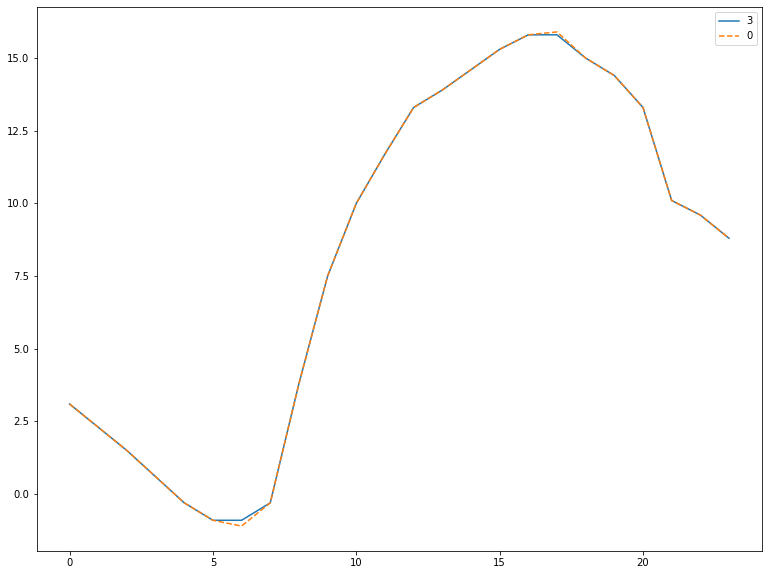

In [21]:
index = 100

t_filtered4 = scipy.ndimage.filters.median_filter(t[index], size=4)
t_filtered2 = scipy.ndimage.filters.median_filter(t[index], size=2)
t_filtered3 = scipy.ndimage.filters.median_filter(t[index], size=3)

#plt.plot(t_filtered2, label='2')
plt.plot(t_filtered3, label='3')
#plt.plot(t_filtered1, label='4')
plt.plot(t[index], '--', label='0')

plt.legend()
plt.show()


In [22]:
t1 = (t_avg - t_avg.mean()) / t.std()

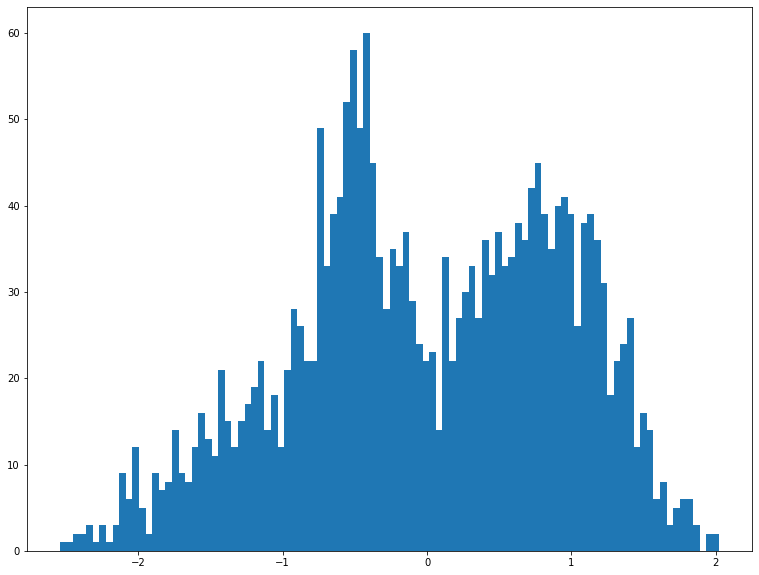

In [23]:
plt.hist(t1, 100)
plt.show()

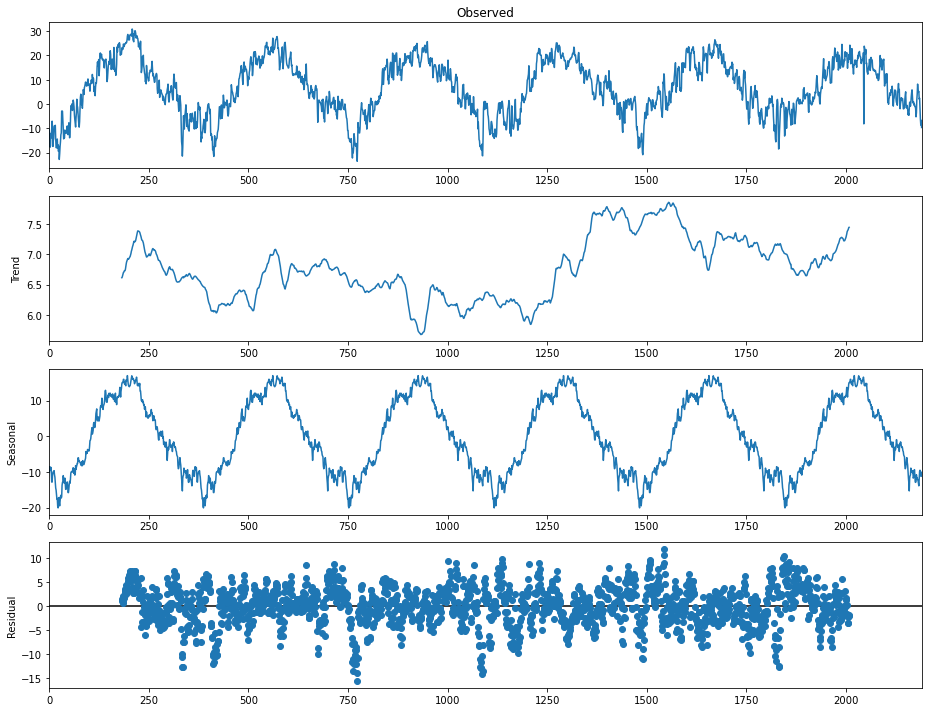

In [25]:
res = seasonal_decompose(t_avg, period=365)
plt.rc("figure", figsize=(13,10))
fig = res.plot()

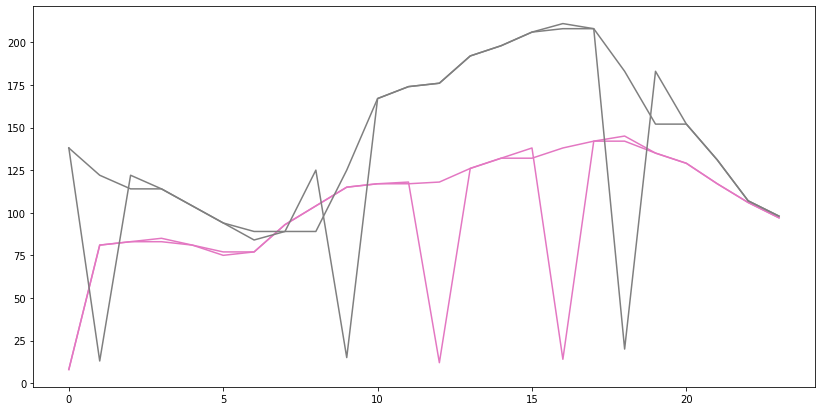

In [11]:
plt.figure(figsize=(14, 7))

for i in range(5, 7):
    plt.plot(t[i * 100], 'C' + str(i + 1))
    t_filtered = scipy.ndimage.filters.median_filter(t[i * 100], size=3)
    plt.plot(t_filtered, 'C' + str(i + 1))
    # plt.plot([t[i * 100].mean()] * 24, 'C' + str(i + 1))

plt.show()

In [12]:
e_avg_years = []

for i in range(6):
    e_avg_years.append(e_avg[i * 365 : (i + 1) * 365])

In [21]:
print(holiday)

[2 2 2 ... 1 1 1]


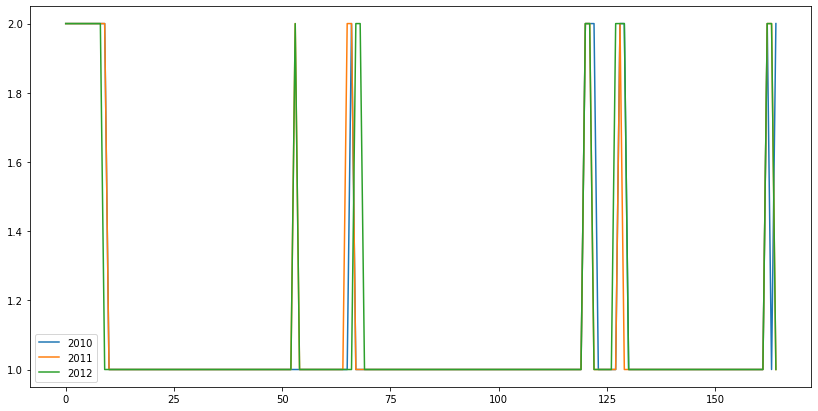

In [26]:
x = range(365)

plt.figure(figsize=(14, 7))

for i in range(3):
    plt.plot(holiday[i * 365 : (i + 1) * 365 - 200], label=str(2010 + i))
    
plt.legend()
plt.show()

5.6372258904036405


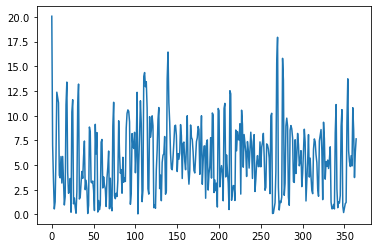

In [51]:
avg = (e1_years[0] + e1_years[1] + e1_years[2] + e1_years[3] + e1_years[4]) / 5

deviation = abs(avg - e1_years[5]) / e1_years[5] * 100
accuracy = np.mean(deviation)
print(accuracy)


plt.plot(x, deviation)
plt.show()